### 데이터 전처리

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

```python
class0_data = pd.read_csv('./datasets/만료및탈퇴회원.csv', index_col=0)
class1_data = pd.read_csv('./datasets/정회원.csv', index_col=0)
display(class0_data, class1_data)
```

In [2]:
class0_data = pd.read_csv('./만료및탈퇴회원.csv', index_col=0)
class1_data = pd.read_csv('./정회원.csv', index_col=0)
display(class0_data, class1_data)

,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_activeday_count,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm
0,008c6dd3-23f5-47f2-bf12-786243927bd5,F,초등,초6,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
1,027a7135-be16-4574-a826-5e4b34eed8a0,M,초등,초6,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
2,02e998fc-1b98-485b-87ca-4e1ef40637f3,M,초등,초2,44,학습생(만료),"01,44",0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
3,0342a5d3-2b88-42ee-ba65-665af2cb48c3,F,초등,초3,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
4,03b8bdcb-699f-4632-a2f2-90da954b34ac,M,초등,초5,44,학습생(만료),"-,00,01,44",3,0,15,...,1.0,1.0,100.0,1.0,1.0,NaN,NaN,NaN,2022,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111846,fe0e970c-f546-4d32-8d15-a77889d1da78,M,초등,초5,44,학습생(만료),"11,44",0,0,0,...,6.0,10.0,71.0,59.0,46.0,NaN,NaN,NaN,2022,11
111847,fe10a0fd-b106-47a9-9440-4499e7bc42c7,M,초등,초3,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11
111848,ff02ec2b-0152-4028-b72f-79a6d78485b6,F,초등,초5,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11
111849,ff64565a-53f8-4362-8376-32432a231566,F,초등,초4,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11


,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_activeday_count,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm
0,00030bf4-20ae-4b1d-a9e1-f9f8c6511cbd,M,초등,초2,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11",12,0,0,...,16.0,25.0,72.60,137.0,102.0,7.0,9.0,9.0,2022,5
1,000864c3-209f-48c5-9fe8-fbb78f0a34f2,M,초등,초3,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-",22,0,0,...,7.0,17.0,78.12,117.0,92.0,NaN,NaN,NaN,2022,5
2,00162b6a-6d94-4d74-a612-8e4da80a231d,M,초등,초6,11,학습생(정),"-,11,-,11,-,11,-,11,-,11,-,11,-,11",22,0,0,...,6.0,10.0,51.30,78.0,37.0,2.0,17.0,17.0,2022,5
3,0022ec3b-7297-4bf0-a49c-406fec1b4278,M,초등,초2,11,학습생(정),"-,11,-,11,-,11",3,0,0,...,21.0,39.0,69.03,222.0,148.0,25.0,36.0,36.0,2022,5
4,002547f0-fc48-49c9-b8d8-66887209e61f,M,초등,초4,11,학습생(정),"-,11,-,11,-,11,-,11,-,11",8,0,0,...,22.0,58.0,72.67,410.0,309.0,31.0,48.0,48.0,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,897aecf4-f213-48d3-9ee9-bbf7a3015313,F,초등,초3,11,학습생(정),11,0,0,0,...,9.0,24.0,74.08,173.0,133.0,NaN,NaN,NaN,2022,9
99996,89949613-340b-4d8d-9a16-450d35f95e25,F,초등,초3,11,학습생(정),11,0,0,0,...,16.0,52.0,66.69,301.0,227.0,NaN,NaN,NaN,2022,9
99997,899b9567-69b2-484c-87a8-368bb31ed469,M,초등,초1,11,학습생(정),11,0,0,0,...,24.0,54.0,83.78,307.0,254.0,NaN,NaN,NaN,2022,9
99998,89bb2f78-b0da-4cfa-9e8c-793656ad2c63,M,초등,초5,11,학습생(정),11,0,0,0,...,21.0,37.0,82.84,243.0,209.0,18.0,21.0,21.0,2022,9


**분석 목표 : 다음달에 탈퇴하는 회원의 현재달의 징조 파악하기**

In [3]:
## 11월에 탈퇴한 회원의 10월 데이터 - 탈퇴회원 데이터
exit_user = class0_data[class0_data['mm'] == 11]['userid'].unique()
exit_data = class1_data[(class1_data['userid'].isin(exit_user)) & (class1_data['mm'] == 10)]

exit_data['target'] = 0 # will exit

exit_data

,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm,target
3678,00132af0-87d8-4b7e-bbbf-4d67a1accc2b,F,초등,초3,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-,11,-",15,0,0,...,39.0,64.36,220.0,143.0,2.0,5.0,4.0,2021,10,0
3693,01123b39-b626-4d80-a399-8d424c11b4a0,M,초등,초5,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-,11",15,0,0,...,14.0,76.00,97.0,75.0,NaN,NaN,NaN,2021,10,0
3717,02300eca-940f-4971-a898-5fb83d3b07ea,F,초등,초1,11,학습생(정),"-,11,-,11,-,11,-,11,-,11",24,0,0,...,9.0,74.89,51.0,37.0,NaN,NaN,NaN,2021,10,0
3719,0248e2ee-9ecb-48f8-9658-67fd41d99b24,M,초등,초3,11,학습생(정),"-,11,-,11,-,11,-,11,-,11,-,11,-",19,0,0,...,36.0,43.22,196.0,92.0,NaN,NaN,NaN,2021,10,0
3742,03411e28-b8e4-419d-aae0-b9809ed60402,M,초등,초5,11,학습생(정),"-,11,-,11,-",29,0,0,...,8.0,75.38,49.0,37.0,NaN,NaN,NaN,2021,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97036,1225f6fc-204b-469e-a9c2-2c5f7f360747,F,초등,초2,11,학습생(정),11,0,0,0,...,28.0,84.18,105.0,97.0,NaN,NaN,NaN,2022,10,0
97042,124dbcb9-76ca-4d47-ae35-e53fff3cc1ff,M,초등,초5,11,학습생(정),"55,11",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,10,0
97204,1aafd5a8-b056-4361-8649-fb4820797965,M,초등,초3,11,학습생(정),11,0,0,0,...,48.0,62.58,247.0,143.0,3.0,11.0,8.0,2022,10,0
97285,1dc2e28a-b2c4-462b-83cb-98fdddfabf21,M,초등,초6,11,학습생(정),11,0,0,0,...,2.0,20.00,10.0,2.0,NaN,NaN,NaN,2022,10,0


```python
## 11월에 정회원인 회원의 10월 데이터 - 정회원 데이터
regular_user = class1_data[class1_data['mm'] == 11]['userid'].unique()
regular_data = class1_data[(class1_data['userid'].isin(regular_user)) & (class1_data['mm'] == 10)]

regular_data['target'] = 'WILL STAY'

regular_data
```

In [4]:
## 11월에 정회원인 회원의 10월 데이터 - 정회원 데이터
regular_user = class1_data[class1_data['mm'] == 11]['userid'].unique()
regular_data = class1_data[(class1_data['userid'].isin(regular_user)) & (class1_data['mm'] == 10)]

regular_data['target'] = 1 # will stay

regular_data

,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm,target
26901,000213f1-0f58-48d6-bcb3-3c15864b7d5a,M,초등,초4,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-,11,-,11",20,0,0,...,19.0,46.89,99.0,33.0,1.0,15.0,13.0,2021,10,1
26902,0006cc87-557b-4ee7-8604-8b3afa86a31c,F,초등,초2,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-",11,0,0,...,28.0,79.57,170.0,132.0,7.0,7.0,7.0,2021,10,1
26903,001ef835-25e0-4f2a-9aa8-4aa2bad7a3dc,M,초등,초4,11,학습생(정),"-,11,-,11,-,11,-,11,-,11,-,11,-",22,0,0,...,17.0,66.35,104.0,74.0,NaN,NaN,NaN,2021,10,1
26904,001f9510-f994-4516-b77d-d8a1bf181289,F,초등,초3,11,학습생(정),"11,-,11,-,11,-,11,-",7,0,0,...,71.0,90.35,446.0,393.0,21.0,26.0,26.0,2021,10,1
26905,00203c3e-dd28-450d-b2d6-b6959dc81d04,M,초등,초3,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-",14,0,0,...,35.0,77.09,243.0,191.0,3.0,9.0,9.0,2021,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58117,ffba3c0f-5af8-4fa5-9b3b-2c2e432dedc3,F,초등,초2,11,학습생(정),"11,-,11,-,11,-,11,-,11,-",11,0,0,...,26.0,72.19,152.0,106.0,NaN,NaN,NaN,2021,10,1
58118,ffc0b882-6280-44c5-b11e-1147e1bf6e0f,F,초등,초3,11,학습생(정),"-,11,-,11,-,11,-,11,-",25,0,0,...,16.0,74.00,120.0,93.0,6.0,6.0,6.0,2021,10,1
58119,ffc0cb97-b4e9-4a19-8f07-e5c5870a6f5a,M,초등,초1,11,학습생(정),"-,11,-,11,-,11,-,11,-,11",9,0,0,...,46.0,79.85,270.0,216.0,NaN,NaN,NaN,2021,10,1
58120,ffcae717-8d1e-4055-be25-24a907f7397c,M,초등,초6,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-",7,0,0,...,13.0,81.08,80.0,67.0,NaN,NaN,NaN,2021,10,1


```python
dataset = pd.concat([exit_data, regular_data])
```

In [5]:
dataset = pd.concat([exit_data, regular_data])

```python
dataset['target'].value_counts()
```

In [6]:
dataset['target'].value_counts()

1    4128
0    1251
Name: target, dtype: int64

```python
dataset = dataset.dropna(subset = ['point_gain_activeday_count', 'point_gain_count', 'point_gain', 
             'point_loss_activeday_count', 'point_loss_count', 'point_loss',
             'tablet_activeday_count', 'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count', 
             'tablet_login_count', 'tablet_logout_count', 'study_activeday_count', 'study_count',
             'study_notcompleted_count', 'study_completed_count',
             'study_restart_count', 'total_system_learning_time', 'total_caliper_learning_time',
             'media_activeday_count', 'media_count',
             'video_action_count', 'video_start_count', 'video_restart_count',
             'video_pause_count', 'video_jump_count', 'video_resume_count',
             'video_speed_count', 'video_volume_count', 'video_end_count',
             'test_activeday_count', 'test_count', 'test_average_score',
             'test_item_count', 'test_correct_count', 'wrong_count',
             'wrong_item_count', 'wrong_correct_count'
             ])
```

In [7]:
dataset = dataset.dropna(subset = ['point_gain_activeday_count', 'point_gain_count', 'point_gain', 
             'point_loss_activeday_count', 'point_loss_count', 'point_loss',
             'tablet_activeday_count', 'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count', 
             'tablet_login_count', 'tablet_logout_count', 'study_activeday_count', 'study_count',
             'study_notcompleted_count', 'study_completed_count',
             'study_restart_count', 'total_system_learning_time', 'total_caliper_learning_time',
             'media_activeday_count', 'media_count',
             'video_action_count', 'video_start_count', 'video_restart_count',
             'video_pause_count', 'video_jump_count', 'video_resume_count',
             'video_speed_count', 'video_volume_count', 'video_end_count',
             'test_activeday_count', 'test_count', 'test_average_score',
             'test_item_count', 'test_correct_count', 'wrong_count',
             'wrong_item_count', 'wrong_correct_count'
             ])

```python
X = dataset[['point_gain_activeday_count', 'point_gain_count', 'point_gain', 
             'point_loss_activeday_count', 'point_loss_count', 'point_loss',
             'tablet_activeday_count', 'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count', 
             'tablet_login_count', 'tablet_logout_count', 'study_activeday_count', 'study_count',
             'study_notcompleted_count', 'study_completed_count',
             'study_restart_count', 'total_system_learning_time', 'total_caliper_learning_time',
             'media_activeday_count', 'media_count',
             'video_action_count', 'video_start_count', 'video_restart_count',
             'video_pause_count', 'video_jump_count', 'video_resume_count',
             'video_speed_count', 'video_volume_count', 'video_end_count',
             'test_activeday_count', 'test_count', 'test_average_score',
             'test_item_count', 'test_correct_count', 'wrong_count',
             'wrong_item_count', 'wrong_correct_count'
             ]]
```

```python
Y = dataset['target']
```

In [8]:
X = dataset[['point_gain_activeday_count', 'point_gain_count', 'point_gain', 
             'point_loss_activeday_count', 'point_loss_count', 'point_loss',
             'tablet_activeday_count', 'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count', 
             'tablet_login_count', 'tablet_logout_count', 'study_activeday_count', 'study_count',
             'study_notcompleted_count', 'study_completed_count',
             'study_restart_count', 'total_system_learning_time', 'total_caliper_learning_time',
             'media_activeday_count', 'media_count',
             'video_action_count', 'video_start_count', 'video_restart_count',
             'video_pause_count', 'video_jump_count', 'video_resume_count',
             'video_speed_count', 'video_volume_count', 'video_end_count',
             'test_activeday_count', 'test_count', 'test_average_score',
             'test_item_count', 'test_correct_count', 'wrong_count',
             'wrong_item_count', 'wrong_correct_count'
             ]]
Y = dataset['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 , random_state= 156)

### 모델 적용

#### Bagging(배깅)

```python
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix
lr_clf = LogisticRegression(solver='liblinear')

bagging_clf = BaggingClassifier(base_estimator=lr_clf)

# BaggingClassifier 학습/예측. 
bagging_clf.fit(X_train , y_train)
pred = bagging_clf.predict(X_test)
```

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix
lr_clf = LogisticRegression(solver='liblinear')

bagging_clf = BaggingClassifier(base_estimator=lr_clf)

# BaggingClassifier 학습/예측. 
bagging_clf.fit(X_train , y_train)
pred = bagging_clf.predict(X_test)

```python
# 평가
accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('Bagging 분류기 정확도: {0:.4f}'.format(accuracy))
print('Bagging 분류기 Recall: {0:.4f}'.format(recall))
print('Bagging 분류기 Precision: {0:.4f}'.format(precision))
print('Bagging 분류기 AUC: {0:.4f}'.format(auc))
print('Bagging 분류기 Confusion Matrix:','\n', matrix)
```

In [11]:
# 평가
accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('Bagging 분류기 정확도: {0:.4f}'.format(accuracy))
print('Bagging 분류기 Recall: {0:.4f}'.format(recall))
print('Bagging 분류기 Precision: {0:.4f}'.format(precision))
print('Bagging 분류기 AUC: {0:.4f}'.format(auc))
print('Bagging 분류기 Confusion Matrix:','\n', matrix)

# 중간에 탈퇴한 학생의 경우 활동 횟수가 적으니까 예측하기가 쉬웠을 것임.
# 하지만 전달의 데이터를 사용하니 모델이 학습하기 어려웠을 것이다.

Bagging 분류기 정확도: 0.8323
Bagging 분류기 Recall: 0.9927
Bagging 분류기 Precision: 0.8369
Bagging 분류기 AUC: 0.5056
Bagging 분류기 Confusion Matrix: 
 [[  2 106]
 [  4 544]]


```python
# 개별 모델의 학습/예측/평가.
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
class_name= lr_clf.__class__.__name__

accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('{0} 정확도: {1:.4f}'.format(class_name, accuracy))
print('{0} Recall: {1:.4f}'.format(class_name, recall))
print('{0} Precision: {1:.4f}'.format(class_name, precision))
print('{0} AUC: {1:.4f}'.format(class_name, auc))
print('{0} Confusion Matrix:'.format(class_name),'\n', matrix)
```


In [12]:
# 개별 모델의 학습/예측/평가.
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
class_name= lr_clf.__class__.__name__

accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('{0} 정확도: {1:.4f}'.format(class_name, accuracy))
print('{0} Recall: {1:.4f}'.format(class_name, recall))
print('{0} Precision: {1:.4f}'.format(class_name, precision))
print('{0} AUC: {1:.4f}'.format(class_name, auc))
print('{0} Confusion Matrix:'.format(class_name),'\n', matrix)

LogisticRegression 정확도: 0.8323
LogisticRegression Recall: 0.9964
LogisticRegression Precision: 0.8349
LogisticRegression AUC: 0.4982
LogisticRegression Confusion Matrix: 
 [[  0 108]
 [  2 546]]


#### 랜덤 포레스트

```python
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))
print('랜덤 포레스트 Recall: {0:.4f}'.format(recall))
print('랜덤 포레스트 Precision: {0:.4f}'.format(precision))
print('랜덤 포레스트 AUC: {0:.4f}'.format(auc))
print('랜덤 포레스트 Confusion Matrix:','\n', matrix)
```

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))
print('랜덤 포레스트 Recall: {0:.4f}'.format(recall))
print('랜덤 포레스트 Precision: {0:.4f}'.format(precision))
print('랜덤 포레스트 AUC: {0:.4f}'.format(auc))
print('랜덤 포레스트 Confusion Matrix:','\n', matrix)

랜덤 포레스트 정확도: 0.8110
랜덤 포레스트 Recall: 0.9690
랜덤 포레스트 Precision: 0.8323
랜덤 포레스트 AUC: 0.4891
랜덤 포레스트 Confusion Matrix: 
 [[  1 107]
 [ 17 531]]


```python
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_importances.sort_values(ascending=False)[:20]
```

In [14]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_importances.sort_values(ascending=False)[:20]

point_gain                     0.080595
point_gain_count               0.051370
tablet_moved_menu_count        0.046231
total_system_learning_time     0.042344
test_average_score             0.039101
test_correct_count             0.036494
study_restart_count            0.031903
video_action_count             0.031348
study_count                    0.030177
video_end_count                0.030000
total_caliper_learning_time    0.029384
test_item_count                0.029266
media_count                    0.029174
point_gain_activeday_count     0.026849
test_count                     0.026817
study_completed_count          0.026542
video_jump_count               0.025246
wrong_item_count               0.024433
video_start_count              0.024102
media_activeday_count          0.023903
dtype: float64

```python
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()
```

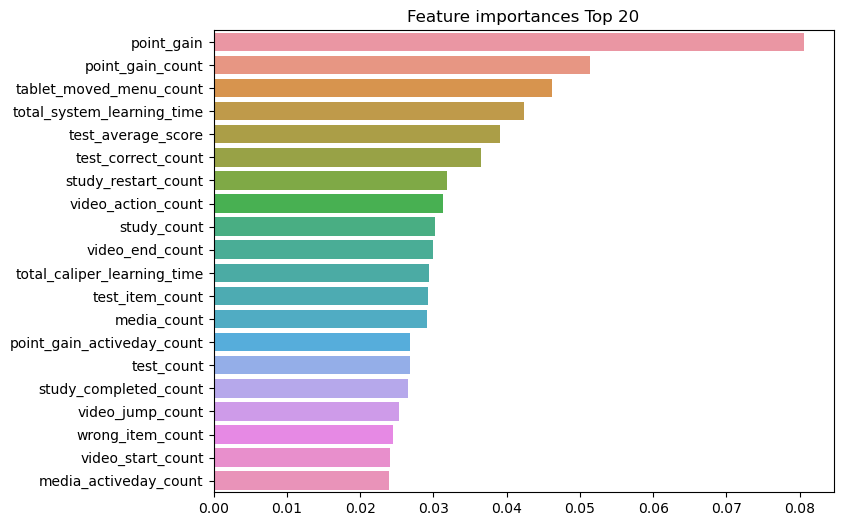

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### 그래디언트 부스팅

```python
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test , gb_pred)
recall = recall_score(y_test, gb_pred)
precision = precision_score(y_test, gb_pred)
auc = roc_auc_score(y_test, gb_pred)
matrix = confusion_matrix(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(accuracy))
print('GBM Recall: {0:.4f}'.format(recall))
print('GBM Precision: {0:.4f}'.format(precision))
print('GBM AUC: {0:.4f}'.format(auc))
print('GBM Confusion Matrix:','\n', matrix)

print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))
```

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test , gb_pred)
recall = recall_score(y_test, gb_pred)
precision = precision_score(y_test, gb_pred)
auc = roc_auc_score(y_test, gb_pred)
matrix = confusion_matrix(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(accuracy))
print('GBM Recall: {0:.4f}'.format(recall))
print('GBM Precision: {0:.4f}'.format(precision))
print('GBM AUC: {0:.4f}'.format(auc))
print('GBM Confusion Matrix:','\n', matrix)

print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.8049
GBM Recall: 0.9489
GBM Precision: 0.8387
GBM AUC: 0.5115
GBM Confusion Matrix: 
 [[  8 100]
 [ 28 520]]
GBM 수행 시간: 1.2 초 
